In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(x)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer (transformers=[('encoder',OneHotEncoder(),[1,4,5])],remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 1.0 1.0 ... 18 33.77 1]
 [0.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [11]:
print(x[0,:])

[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]


In [12]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size =0.2,random_state = 0)
print(x_te)

[[0.0 1.0 1.0 ... 52 30.2 1]
 [1.0 0.0 1.0 ... 47 29.37 1]
 [0.0 1.0 0.0 ... 48 40.565 2]
 ...
 [0.0 1.0 1.0 ... 57 40.28 0]
 [1.0 0.0 0.0 ... 30 39.05 3]
 [0.0 1.0 1.0 ... 46 24.795 3]]


In [13]:
x_temp = x[:,1:]
print(x_temp)


[[0.0 0.0 1.0 ... 19 27.9 0]
 [1.0 1.0 0.0 ... 18 33.77 1]
 [1.0 1.0 0.0 ... 28 33.0 3]
 ...
 [0.0 1.0 0.0 ... 18 36.85 0]
 [0.0 1.0 0.0 ... 21 25.8 0]
 [0.0 0.0 1.0 ... 61 29.07 0]]


In [14]:
x_temp.shape

(1338, 10)

In [15]:
const = np.ones((1338,1))
x_temp = np.append(arr = const, values=x_temp,axis=1)
print(x_temp)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [1.0 1.0 1.0 ... 18 33.77 1]
 [1.0 1.0 1.0 ... 28 33.0 3]
 ...
 [1.0 0.0 1.0 ... 18 36.85 0]
 [1.0 0.0 1.0 ... 21 25.8 0]
 [1.0 0.0 0.0 ... 61 29.07 0]]


In [20]:
x_opt = np.array(x_temp[:,[0,1,2,3,4,5,6,7,8,9,10]], dtype=float)

stats = sm.OLS(endog = y, exog=x_opt).fit()


In [21]:
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:41:45   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -343.5889    559.574     -0.614      0.5

In [22]:
x_opt = np.array(x_temp[:,[0,2,3,4,5,6,7,8,9,10]], dtype=float)
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:41:55   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -376.3422    553.201     -0.680      0.4

In [23]:
x_opt = np.array(x_temp[:,[0,2,3,4,6,7,8,9,10]], dtype=float)
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:42:29   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -282.8678    654.466     -0.432      0.6

In [24]:
x_opt = np.array(x_temp[:,[2,3,4,6,7,8,9,10]], dtype=float)
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:42:59   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.234e+04    979.405    -12.602      0.0

In [25]:
x_opt = np.array(x_temp[:,[2,3,6,7,8,9,10]], dtype=float)
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:43:24   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.217e+04    949.538    -12.812      0.0

In [26]:
x_opt = np.array(x_temp[:,[2,3,6,8,9,10]], dtype=float)
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     799.7
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:44:08   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.228e+04    948.666    -12.940      0.0

In [27]:
x_opt = np.array(x_temp[:,[2,3,8,9,10]], dtype=float)
stats = sm.OLS(endog = y, exog=x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 06 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:44:49   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -1.21e+04    941.984    -12.848      0.0

In [29]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x_opt,y,test_size =0.2,random_state = 0)
regressor1 = LinearRegression()
regressor1.fit(x_train,y_train)
print(x_test)

[[ 1.     0.    52.    30.2    1.   ]
 [ 1.     0.    47.    29.37   1.   ]
 [ 0.     1.    48.    40.565  2.   ]
 ...
 [ 1.     0.    57.    40.28   0.   ]
 [ 0.     1.    30.    39.05   3.   ]
 [ 1.     0.    46.    24.795  3.   ]]


In [30]:
y_pred1 = regressor1.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae1 = mean_absolute_error(y_test,y_pred1)
mse1 = mean_squared_error(y_test,y_pred1)
rmse1 = np.sqrt(mse1)
print(mae1)
print(mse1)
print(rmse1)

3941.069397763105
32171708.572455734
5672.01098134125


<IPython.core.display.Javascript object>


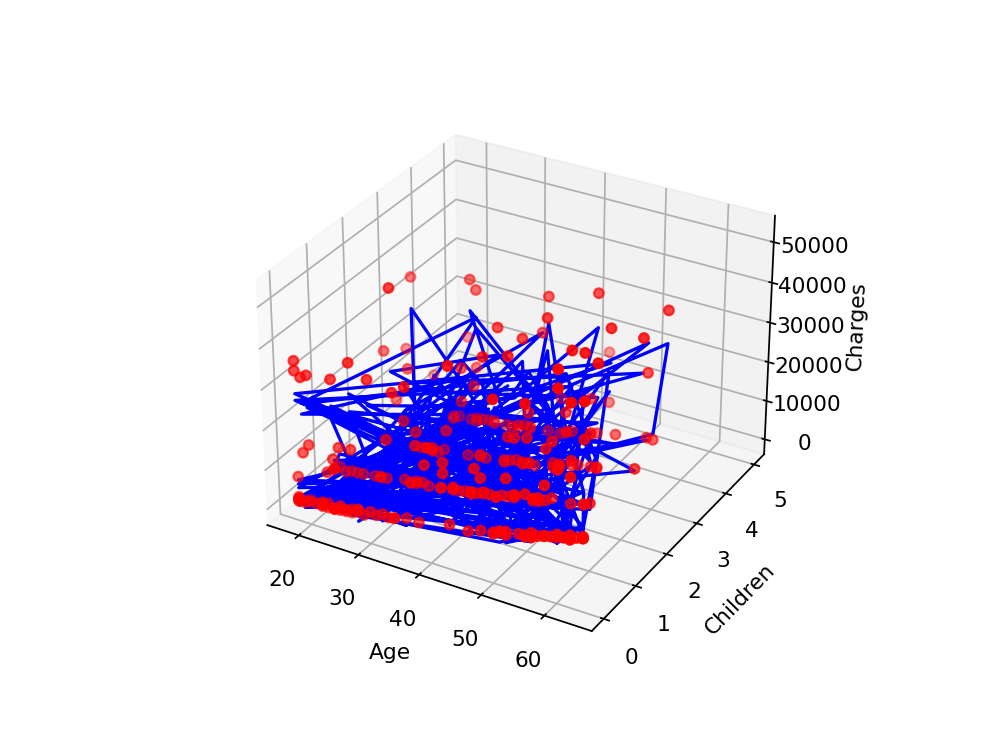

In [34]:
%matplotlib notebook
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,2],x_test[:,4],y_test,c='red')
ax.plot3D(x_test[:,2],x_test[:,4],y_pred1,c='blue')
ax.set_xlabel('Age')
ax.set_ylabel('Children')
ax.set_zlabel('Charges')
plt.show()

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_opt = pca.fit_transform(x_opt)
PVE = pca.explained_variance_ratio_
print(PVE)

[0.8374617]


In [37]:
print(x_opt)

[[-20.33852847]
 [-20.99043451]
 [-11.04482733]
 ...
 [-20.81504388]
 [-18.46259325]
 [ 21.65814248]]


In [54]:
from sklearn.preprocessing import LabelEncoder
rt = LabelEncoder()
y_train = rt.fit_transform(y_train)
y_test = rt.fit_transform(y_test)

In [47]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train) 

SVC(kernel='linear', random_state=0)

In [48]:
y_pred2 = classifier.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,y_pred2)
cm = confusion_matrix(y_test,y_pred2)
print(acc)
print(cm)

0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
